# Heart Attack Dataset Analysis

# Importing necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data.

In [2]:
raw_data = pd.read_csv(r"C:\Users\fatma\Desktop\me\data science\heart.csv")
raw_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# A small description of the dataset. 

It is a hearth attack analysis and prediction dataset.
<br>
1.age = age of the patient
<br>
2.sex = sex of the patient
<br>
3.exang = exercise induced angina ( 1 = yes , 2 = no)
<br>
4.ca = number of major vessels (0-3)
<br>
5.cp = chest pain type (1 = typcial angina, 2 = atypical angina , 
3 = non-anginal pain , 4 = asymptomatic)
<br>
6.trtbps = resting blood pressure (in mm Hg)
<br>
7.chol = cholestoral in mg/dl fetched via BMI sensor
<br>
8.restecg = resting electrocardiographic results ( 0 = normal , 1 = having ST-T wave abnormality , 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
<br>
9.thalachh = max heart rate achieved
<br>
target  = 0 = less chance of heart attack , 1 = more chance of hearth attack

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Are there any null values?

In [4]:
raw_data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# The meaningful statistics from the dataset.

## describe()  function for mean, std, min, max, quantile

In [5]:
raw_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## corr() function for the correlations between attributes

In [6]:
raw_data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


# Correlation Heatmap

<AxesSubplot:>

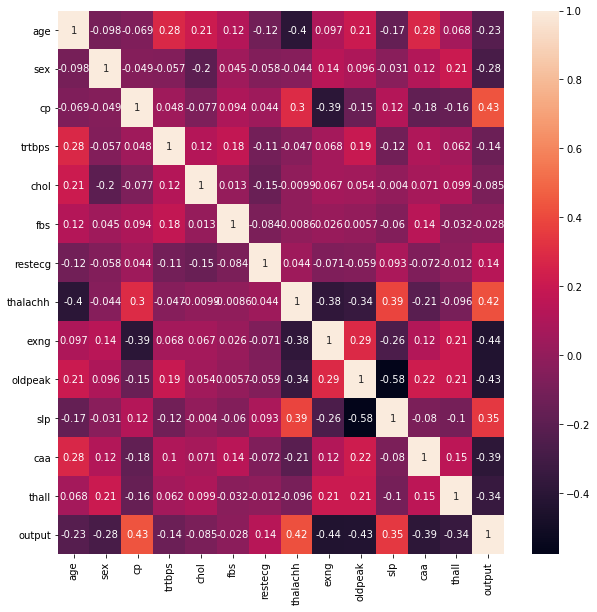

In [7]:
figure = plt.figure(figsize = (10,10))
sns.heatmap(raw_data.corr() , data = raw_data , annot = True )

The correlation heatmap shows the most related, important, and effective attributes on the target attribute. 
It can be seen that thalachh (the maximum heart rate) and the age is negatively correlated as it has been shown above. (-0.4)
Also, cp (chest pain type) is positively highly correlated with the output directly. (0.43)
Thallachh, cp, and sex are selected.

In [8]:
to_analyze = raw_data[["thalachh", "cp" , "sex"]]

In [9]:
to_analyze.describe()

,thalachh,cp,sex
count,303.000000,303.000000,303.000000
mean,149.646865,0.966997,0.683168
std,22.905161,1.032052,0.466011
min,71.000000,0.000000,0.000000
25%,133.500000,0.000000,0.000000
50%,153.000000,1.000000,1.000000
75%,166.000000,2.000000,1.000000
max,202.000000,3.000000,1.000000


The mean of cp is 0.96 which indicates that there are a lot of chest pain type 1 values compared to other types.

The mean of sex is 0.68 which indicates that the data contains rows with more men.

The standard deviation of the maximum heart rate is 22. The half of the is larger than 153 but the mean is 149.65. It indicates that the median of the values is above from the average. There are more values closer to the values that are below the median.

<AxesSubplot:>

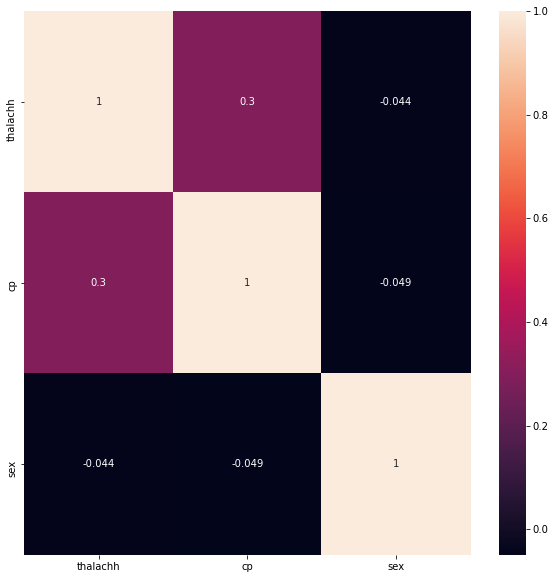

In [10]:
figure = plt.figure(figsize = (10,10))
sns.heatmap(to_analyze.corr() , data = raw_data , annot = True )

## Checking for the outliers.

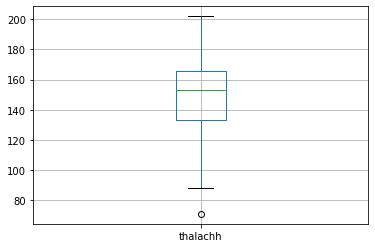

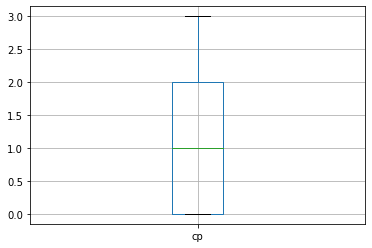

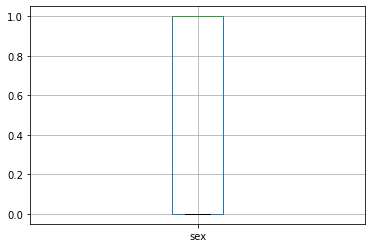

In [11]:
for column in to_analyze:
    plt.figure()
    to_analyze.boxplot([column])

As can be seen above, the thalachh columns contains outliers and has a very high variance.

In [12]:
#The people with heart attack are seperated from the dataset to visualize the attributes of them.
data = raw_data[raw_data['output']==1]
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


# Data Visualization

### The distribution of Categorical Values

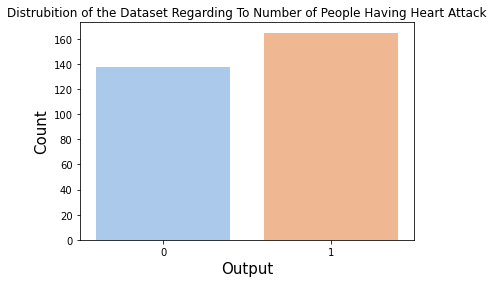

In [13]:
#Since it is a classification problem, the dataset should be balanced in terms of the target value.
#Thus, counting and visualizing the target attribute is quite important.
sns.countplot(x='output',data=raw_data, palette="pastel")
plt.title("Distrubition of the Dataset Regarding To Number of People Having Heart Attack" , fontsize = 12)
plt.xlabel("Output" , fontsize = 15)
plt.ylabel("Count" , fontsize = 15)
plt.show()

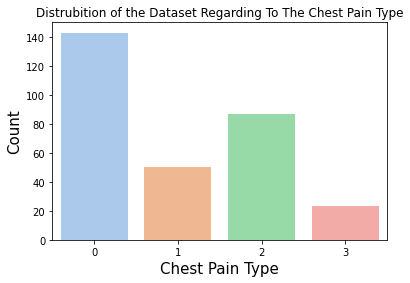

In [14]:
#Chest pain type is a categorical attribute.
#It is also important seeing the distribution of the people with different chest pain types.
sns.countplot(data=raw_data, x="cp", palette="pastel")
plt.title("Distrubition of the Dataset Regarding To The Chest Pain Type" , fontsize = 12)
plt.xlabel("Chest Pain Type" , fontsize = 15)
plt.ylabel("Count" , fontsize = 15)
plt.show()

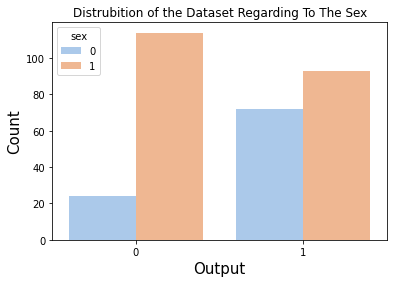

In [15]:
#Gender is also another categorical value.
#It is important to visualize this information since it has a huge effect on the heart attack.
sns.countplot(x='output',data=raw_data, palette="pastel",hue='sex')
plt.title("Distrubition of the Dataset Regarding To The Sex" , fontsize = 12)
plt.xlabel("Output" , fontsize = 15)
plt.ylabel("Count" , fontsize = 15)
plt.show()

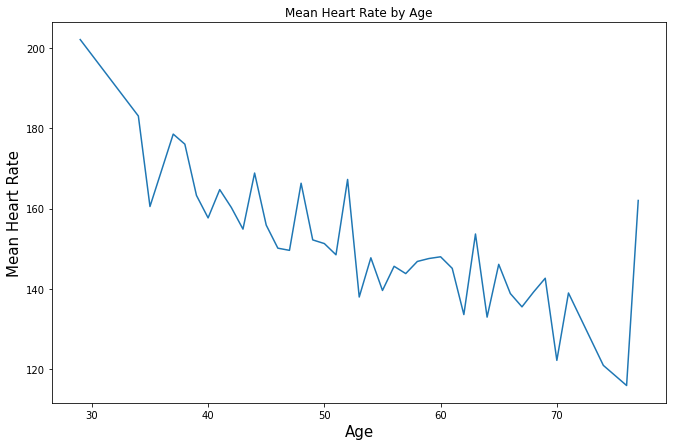

In [16]:
#Intuationally, there should be a relation between the age and the mean heart rate regarding to that age.
#As people get older, the heart rate goes down as known. Thus, a negative trend is expected on the line graph.
mean_rate_by_age = raw_data.groupby('age')['thalachh'].mean()
plt.figure(figsize=(11,7))
plt.plot(mean_rate_by_age.index, mean_rate_by_age.values)
plt.title('Mean Heart Rate by Age', fontsize=12)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Mean Heart Rate', fontsize=15)
plt.show()

<Figure size 720x720 with 0 Axes>

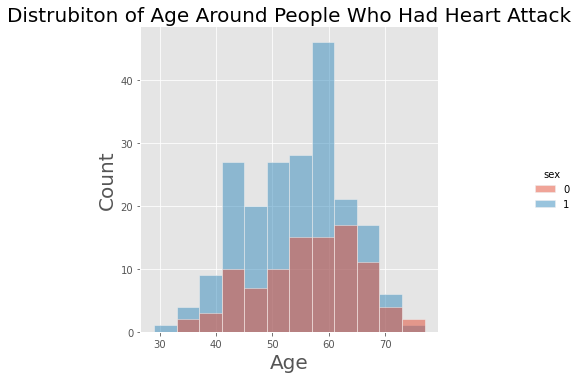

In [17]:
#The distribution of ages of people who had a heart attack before with respect to genders
plt.figure(figsize=(10,10))
plt.style.use("ggplot")
sns.displot(data = raw_data , x = "age" , hue = 'sex')
plt.title("Distrubiton of Age Around People Who Had Heart Attack" , fontsize = 20)
plt.xlabel("Age" , fontsize = 20)
plt.ylabel("Count" , fontsize = 20)
plt.show()

In [18]:
selected_columns =raw_data[["age", "trtbps", "chol","sex"]]
#The columns with numerical values are seperated.

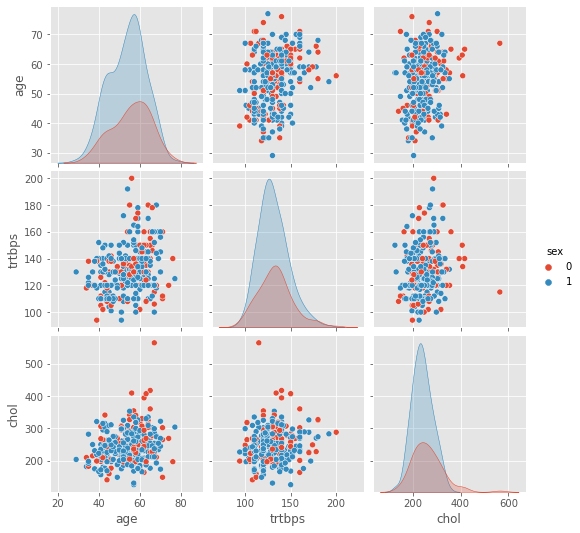

In [19]:
#Pair plot is useful for observing the relation between the numerical values.
sns.pairplot(selected_columns, hue="sex")

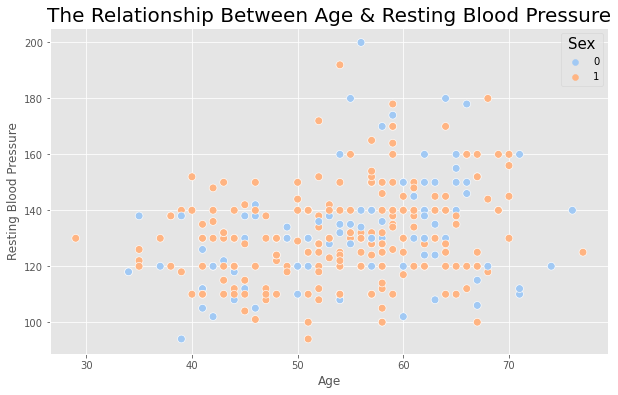

In [20]:
#Scatterplot for searching for a relation between age and resting blood pressure.
plt.figure(figsize=(10,6))
ax = sns.scatterplot(data=raw_data, x='age', y='trtbps', hue='sex', palette='pastel', s=60)
ax.set(xlabel='Age', ylabel='Resting Blood Pressure')
ax.legend(title='Sex', title_fontsize = 15)
plt.title("The Relationship Between Age & Resting Blood Pressure", fontsize=20)
plt.show()

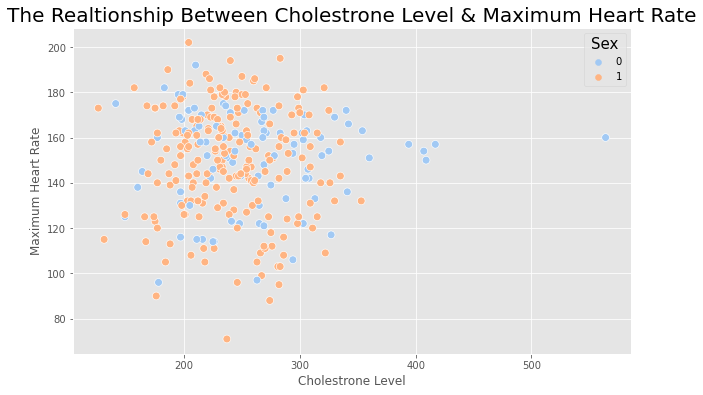

In [21]:
#Scatterplot for searching for a relation between age and resting blood pressure.
#It seems reasonable for us to think such a relation between these attributes.
plt.figure(figsize=(10,6))
ax = sns.scatterplot(data=raw_data, x='chol', y='thalachh', hue='sex', palette='pastel', s=60)
ax.set(xlabel='Cholestrone Level', ylabel='Maximum Heart Rate')
ax.legend(title='Sex', title_fontsize = 15)
plt.title("The Realtionship Between Cholestrone Level & Maximum Heart Rate", fontsize=20)
plt.show()

C:\Users\fatma\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


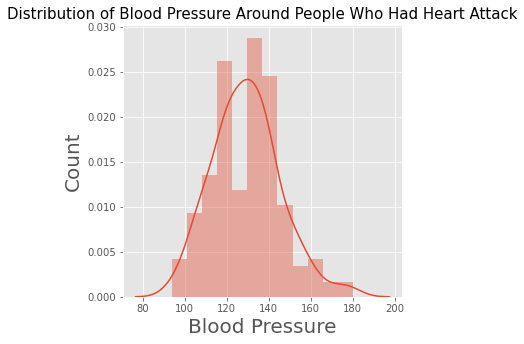

In [22]:
#The distribution of blood pressure of the people who haad heart attack before
plt.figure(figsize=(5,5))
plt.style.use("ggplot")
sns.distplot(data["trtbps"])
plt.title("Distribution of Blood Pressure Around People Who Had Heart Attack" , fontsize = 15)
plt.xlabel("Blood Pressure" , fontsize = 20)
plt.ylabel("Count" , fontsize = 20)
plt.show()

C:\Users\fatma\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


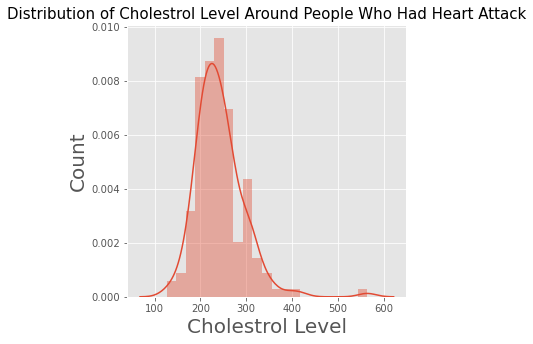

In [23]:
#The distribution of cholestrol level of the people who haad heart attack before
plt.figure(figsize=(5,5))
plt.style.use("ggplot")
sns.distplot(data["chol"])
plt.title("Distribution of Cholestrol Level Around People Who Had Heart Attack" , fontsize = 15)
plt.xlabel("Cholestrol Level" , fontsize = 20)
plt.ylabel("Count" , fontsize = 20)
plt.show()

C:\Users\fatma\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


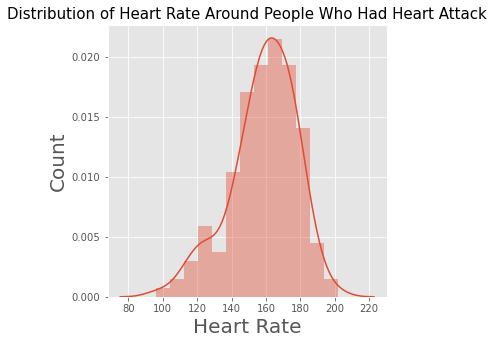

In [24]:
#The distribution of heart rate of the people who haad heart attack before
plt.figure(figsize=(5,5))
plt.style.use("ggplot")
sns.distplot(data["thalachh"])
plt.title("Distribution of Heart Rate Around People Who Had Heart Attack" , fontsize = 15)
plt.xlabel("Heart Rate" , fontsize = 20)
plt.ylabel("Count" , fontsize = 20)
plt.show()